In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_excel("./Puma_Indians_Dataset.xlsx",usecols=['Height_cm','Weight_Kg','Gender'])

# General Information about Data

In [46]:
print(f"Rows&Columns = {df.shape}")
print(f"Columns = {df.columns}")
df.sample()

Rows&Columns = (544, 3)
Columns = Index(['Height_cm', 'Weight_Kg', 'Gender'], dtype='object')


,Height_cm,Weight_Kg,Gender
317,151.765,34.784836,F


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height_cm  544 non-null    float64
 1   Weight_Kg  544 non-null    float64
 2   Gender     544 non-null    object 
dtypes: float64(2), object(1)
memory usage: 12.9+ KB


# Data Pre-Processing

## Treating NaN and Duplicate Values

### Checking for NaN Values

In [48]:
df.isna().sum()

Height_cm    0
Weight_Kg    0
Gender       0
dtype: int64

### Checking for Duplicate Values

In [14]:
df.duplicated().sum()

3

### Dropping Duplicate Values

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
df.shape

(541, 3)

## Descriptive Statistics

### Before Dropping Outliers

In [52]:
df.describe()

,Height_cm,Weight_Kg
count,541.000000,541.000000
mean,138.181685,35.574690
std,27.653396,14.748546
min,53.975000,4.252425
25%,125.095000,21.999212
50%,148.590000,40.029494
75%,157.480000,47.201918
max,179.070000,62.992589


Height:  
Mean - 138.18  
Median - 148.59  (Mean is less than Median, indicates presence of outliers on Left Side)  
StDev - 27.65  
Min - 53.97, Maximum - 179.07

Weight:  
Mean - 35.57  
Median - 40.02  (Mean is less than Median, indicates presence of outliers on Left Side)  
StDev - 14.74  
Min - 4.25, Maximum - 62.99


#### Checking Data Distribution

<Axes: xlabel='Weight_Kg', ylabel='Count'>

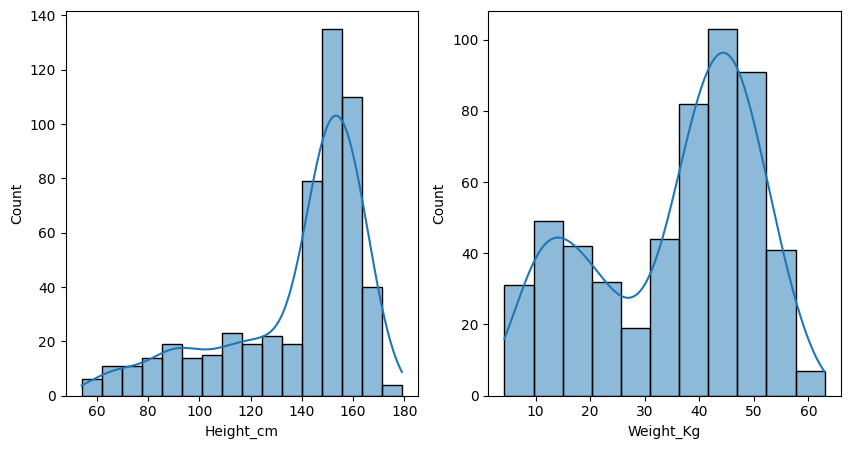

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Height_cm',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Weight_Kg',kde=True)

The Histograms indicate Skewed Distribution

#### Checking for Outliers

<Axes: >

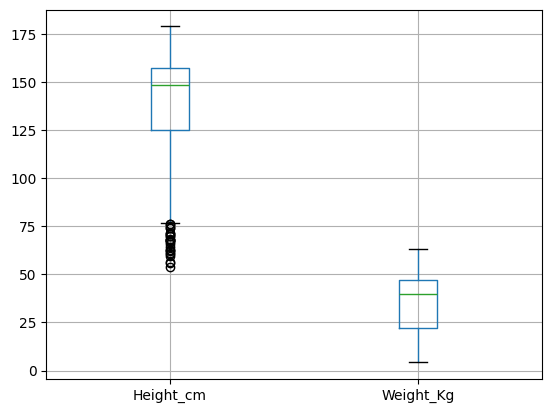

In [54]:
df.boxplot()

### Dropping Outliers

In [55]:
# Function to remove outliers using the Inter-Quartile-Range (IQR) Method
def drop_outliers_using_iqr_method(df,columns_to_drop_in):
    df_ = df.copy()
    for column in columns_to_drop_in:
        q1 = df_[column].quantile(0.25)
        q3 = df_[column].quantile(0.75)
        iqr = q3 - q1

        upper_bound = q3 + (1.5*iqr)
        lower_bound = q1 - (1.5*iqr)

        df_=df_[df_[column]<=upper_bound]
        df_=df_[df_[column]>=lower_bound]

    return df_

In [63]:
df = drop_outliers_using_iqr_method(df,["Height_cm",'Weight_Kg'])

<Axes: >

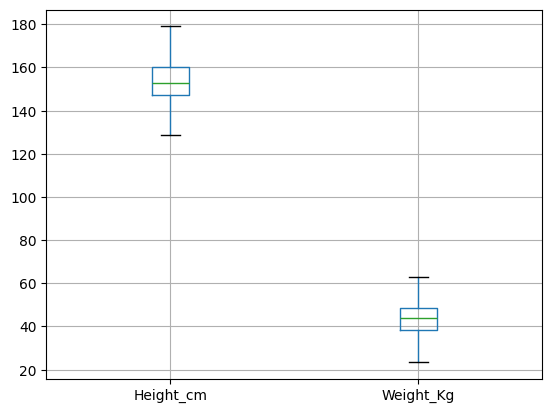

In [64]:
df.boxplot()

In [65]:
df.shape

(393, 3)

### After Dropping Outliers

In [66]:
df.describe()

,Height_cm,Weight_Kg
count,393.000000,393.000000
mean,153.131229,43.489495
std,8.803004,7.722754
min,128.905000,23.359988
25%,147.320000,38.498621
50%,153.035000,43.941725
75%,160.020000,48.647742
max,179.070000,62.992589


Height:  
Mean - 153.13  
Median - 153.03  (Mean is almost equal to Median)  
StDev - 8.80  
Min - 128.9, Maximum - 179.07

Weight:  
Mean - 43.48  
Median - 43.94  (Mean is almost equal to Median)  
StDev - 7.72  
Min - 23.35, Maximum - 62.99


<Axes: xlabel='Weight_Kg', ylabel='Count'>

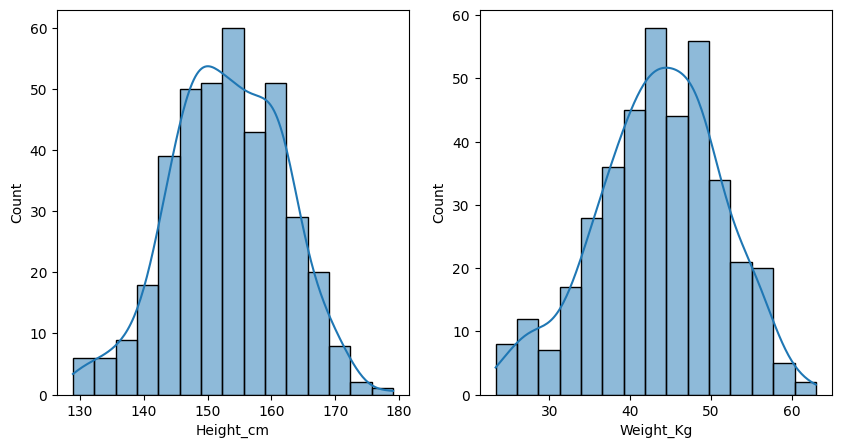

In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Height_cm',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Weight_Kg',kde=True)

The Histograms indicate Gaussian/Normal Distribution

## Scaling the Data using Standard Scaler

In [68]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()

df['Weight_Std_Scaled']=std_scaler.fit_transform(df[['Weight_Kg']])
df['Height_Std_Scaled']=std_scaler.fit_transform(df[['Height_cm']])

<Axes: >

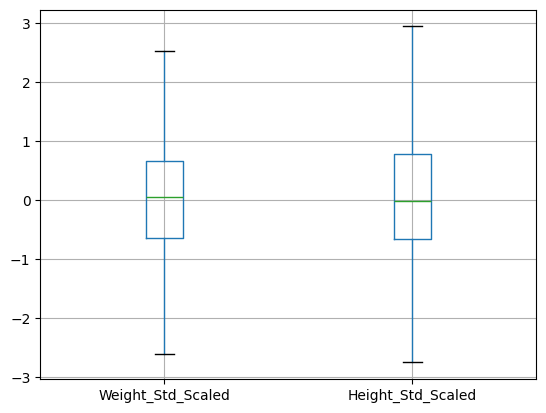

In [69]:
df[['Weight_Std_Scaled','Height_Std_Scaled']].boxplot()

<Axes: xlabel='Weight_Std_Scaled', ylabel='Count'>

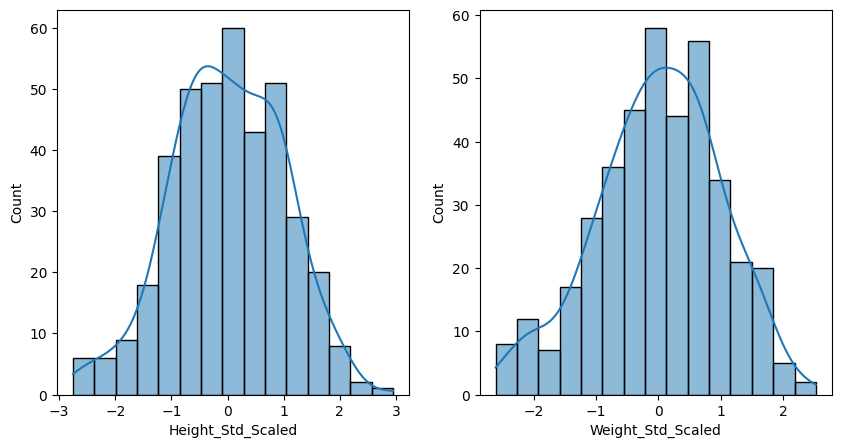

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Height_Std_Scaled',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Weight_Std_Scaled',kde=True)

## Label-Encoding the Genders : (0-Male,1-Female)

In [72]:
df['Gender'].value_counts()

Gender
F    207
M    186
Name: count, dtype: int64

In [73]:
df['Gender'].replace("M",0,inplace=True)
df['Gender'].replace("F",1,inplace=True)

In [74]:
df['Gender'].value_counts()

Gender
1    207
0    186
Name: count, dtype: int64

# Model Building

## Hand-Built Model

### Splitting Dataset into Test and Train Components

In [75]:
train_size = 0.8
nof_rows = len(df)

df_shuffled = df.sample(frac=1)

x_train = df_shuffled[['Height_Std_Scaled','Weight_Std_Scaled']][:int(train_size*nof_rows)]
y_train = df_shuffled[['Gender']][:int(train_size*nof_rows)]

x_test = df_shuffled[['Height_Std_Scaled','Weight_Std_Scaled']][int(train_size*nof_rows):]
y_test = df_shuffled[['Gender']][int(train_size*nof_rows):]

### Defining Functions

In [76]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def predict(X,W):
    return sigmoid(np.matmul(X,W))

def log_loss(X,Y,W):
    y_hat = predict(X,W)
    t1 = Y * np.log(y_hat)
    t2 = (1-Y) * np.log(1 - y_hat)
    return -np.average(t1 + t2)

def gradient(X,Y,W):
    y_hat = predict(X,W)
    return np.matmul(X.T,(y_hat-Y))/X.shape[0]

def train(X,Y,lr,nof_iter):
    data=[]
    W = np.zeros((X.shape[1],Y.shape[1]))
    for i in range(nof_iter):
        loss = log_loss(X,Y,W)
        W -= gradient(X,Y,W) * lr
        data.append([i,loss])
    df=pd.DataFrame(data,columns=['i','Loss'])
    return W,df

def classify(X,W):
    return np.round(predict(X,W))

### Adding Column for Bias

In [77]:
X_train = np.column_stack((np.ones(len(x_train)),x_train))
X_test = np.column_stack((np.ones(len(x_test)),x_test))

In [78]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Training the Model

In [79]:
w,res = train(X_train,y_train,0.001,10000)

In [80]:
res

,i,Loss
0,0,0.693147
1,1,0.693026
2,2,0.692905
3,3,0.692784
4,4,0.692663
...,...,...
9995,9995,0.535483
9996,9996,0.535482
9997,9997,0.535481
9998,9998,0.535479


In [81]:
w

array([[ 0.19066888],
       [-0.89684855],
       [-0.33183814]])

### Checking Accuracy of the Model

In [82]:
def test_model(x,y,w,return_variable=False):                        # Function to find % of Correct Values
    n=x.shape[0]
    correct=np.sum(classify(x,w)==y)
    percentage = (correct/n) * 100
    if(return_variable==True):
        return percentage
    return print(f"Accuracy = {percentage:.2f}%")

In [83]:
test_model(X_test,y_test,w)

Accuracy = 77.22%


### Finding the Best Accuracy of the Model

In [84]:
nof_iters=[10000,100000,1000000]
lrs=[1e-2,1e-3,1e-4]                #0.01,0.001,0.0001
data=[]
for nof_iter in nof_iters:
    for lr in lrs:
        w,df=train(X_train,y_train,lr,nof_iter)
        accuracy=test_model(X_test,y_test,w,return_variable=True)
        data.append([nof_iter,lr,accuracy])
pd.DataFrame(data,columns=['Iterations','Learning_Rate','Accuracy']).sort_values('Accuracy',ascending=False)

,Iterations,Learning_Rate,Accuracy
0,10000,0.0100,84.810127
4,100000,0.0010,84.810127
8,1000000,0.0001,84.810127
3,100000,0.0100,83.544304
6,1000000,0.0100,83.544304
7,1000000,0.0010,83.544304
1,10000,0.0010,77.215190
2,10000,0.0001,77.215190
5,100000,0.0001,77.215190


## Sk-Learn Model

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\punee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [87]:
model.score(x_test,y_test)

0.8481012658227848

# Summary/Observations

1. There are outliers present in the data. A Model trained without removing the outliers gave accuracy of 40%, whereas the model trained after removing the outliers increased to 80%.

2. Removing the Outliers changed the Distribution of Data from skewed to Normal/Gaussian Distribution.

3. Since the features (Height_cm and Weight_Kg) are in two different scales, we used the Standard Scaler to normalize the data. Standard Scaler scaled the values in the range of -3 to +3

4. The Hand Built Model yielded an initial accuracy of 77%, trying different combinations of Learning Rate and Number of Iterations helped us achieve the maximum accuracy of 84.8%, with hyperparameters Learning_Rate = 0.01 and Number of Iterations = 10000

5. From the Data Analysis and Weights, Predictions made by the model, we observe that More the height and more the weight, more are the chances of a person being Male